In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import datasets

In [48]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [49]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [50]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [51]:
import pandas as pd
from sklearn import datasets

# Load the wine dataset
wine = datasets.load_wine()

# Create a DataFrame for features
df_features = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Create a DataFrame for target
df_target = pd.DataFrame(data=wine.target, columns=['target'])

# Concatenate features and target DataFrames along columns
df = pd.concat([df_features, df_target], axis=1)

# Display the DataFrame
df.head(70)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

In [53]:
list = [x_train.size, x_test.size, y_train.size, y_test.size]
list

[1846, 468, 142, 36]

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model1 = GaussianNB()
model2 = MultinomialNB()


In [55]:
model1.fit(x_train,y_train)


GaussianNB()

In [56]:
model2.fit(x_train, y_train)

MultinomialNB()

In [57]:
model1.score(x_test, y_test)


0.9722222222222222

In [58]:
model2.score(x_test, y_test)

0.8333333333333334

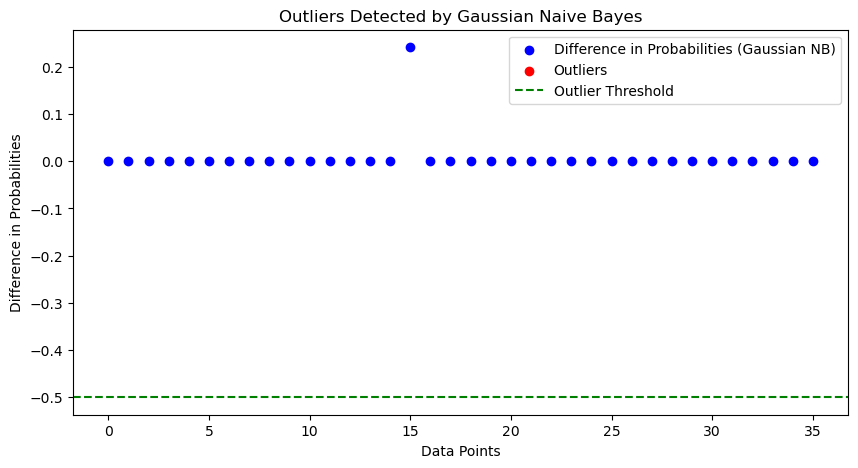

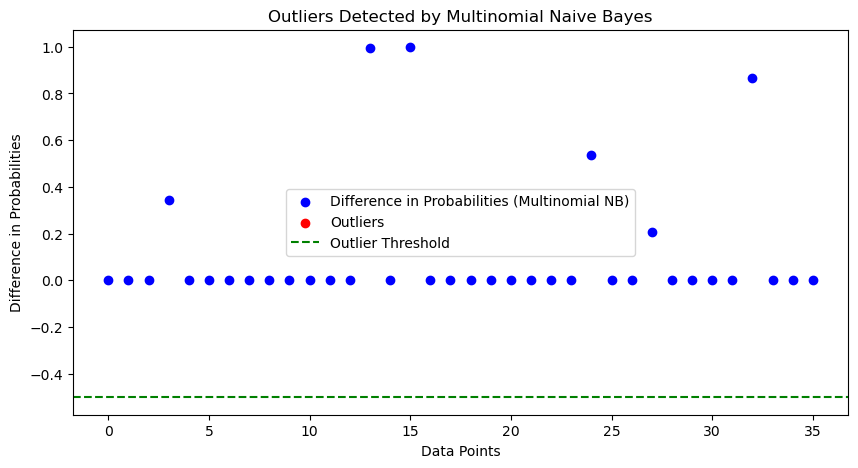

In [59]:
# Get predicted probabilities for each instance
probs1 = model1.predict_proba(x_test)
probs2 = model2.predict_proba(x_test)

# Calculate the difference between predicted probability of the correct class and the maximum predicted probability
diff1 = np.max(probs1, axis=1) - probs1[np.arange(len(probs1)), y_test]
diff2 = np.max(probs2, axis=1) - probs2[np.arange(len(probs2)), y_test]

# Set threshold for identifying outliers
threshold = 0.5  # You can adjust this threshold as needed

# Find indices of outliers
outliers_indices1 = np.where(diff1 < -threshold)[0]
outliers_indices2 = np.where(diff2 < -threshold)[0]

# Plot outliers for Gaussian Naive Bayes
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(len(diff1)), diff1, c='b', label='Difference in Probabilities (Gaussian NB)')
plt.scatter(outliers_indices1, diff1[outliers_indices1], c='r', label='Outliers')
plt.axhline(y=-threshold, color='g', linestyle='--', label='Outlier Threshold')
plt.xlabel('Data Points')
plt.ylabel('Difference in Probabilities')
plt.title('Outliers Detected by Gaussian Naive Bayes')
plt.legend()
plt.show()

# Plot outliers for Multinomial Naive Bayes
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(len(diff2)), diff2, c='b', label='Difference in Probabilities (Multinomial NB)')
plt.scatter(outliers_indices2, diff2[outliers_indices2], c='r', label='Outliers')
plt.axhline(y=-threshold, color='g', linestyle='--', label='Outlier Threshold')
plt.xlabel('Data Points')
plt.ylabel('Difference in Probabilities')
plt.title('Outliers Detected by Multinomial Naive Bayes')
plt.legend()
plt.show()